In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import pickle

In [2]:
def load_cifar10_batch(filename):
    """ load a single batch from CIFAR10 """
    with open (filename, 'rb') as f:
        datadict = pickle.load(f, encoding = 'bytes')
        X = datadict[b'data']
        Y = datadict[b'labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype('float')
        Y = np.array(Y)
        return X, Y
def load_cifar10(dir):
    """ load all batches of CIFAR10 """
    # load train batch file
    xs = []
    ys = []
    
    for i in range(1, 6):
        filename = os.path.join(dir, 'data_batch_%d' % i)
        X, Y = load_cifar10_batch(filename)
        xs.append(X)
        ys.append(Y)
        
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    
    #load test batch 
    Xte, Yte = load_cifar10_batch(os.path.join(dir, 'test_batch'))
    return Xtr, Ytr, Xte, Yte


In [3]:
X_train, y_train, X_test, y_test = load_cifar10('../Reading CIFAR-10 data and selected it/cifar-10-batches-py')

In [4]:
print(X_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000,)


In [5]:
print(y_train[:15])

[6 9 9 4 1 1 2 7 8 3 4 7 7 2 9]


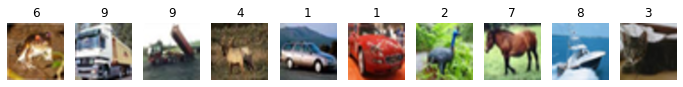

In [6]:
plt.figure(figsize=(12, 2))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_train[i].astype('uint8'), interpolation='spline16')
    plt.title('%d' % y_train[i])
    plt.axis('off')

### Visualize data

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'track']

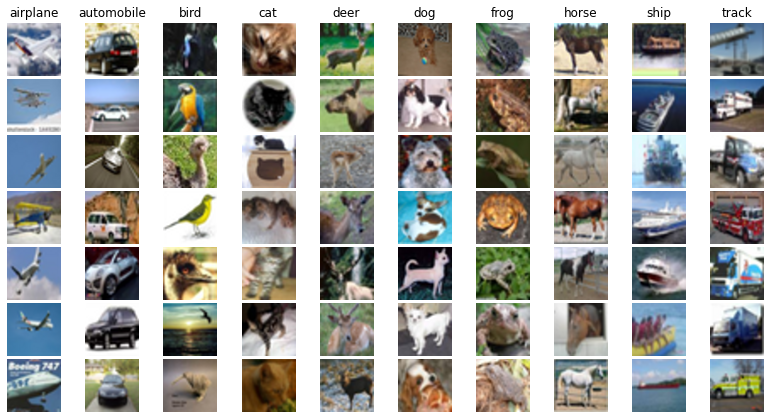

In [12]:
plt.figure(figsize=(12, 6))
plt.subplots_adjust(0, 0, 0.9, 0.9, wspace=0.05, hspace=0.05)
samples_per_class = 7
num_classes = len(class_names)
for c, class_name in enumerate(class_names):
    idxes = np.flatnonzero(y_train == c)
    samples_idxes = np.random.choice(idxes, samples_per_class, replace=False)
    for i, idx in enumerate(samples_idxes):
        plt_idx = i * num_classes + c + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype(np.uint8), interpolation='spline16')
        plt.axis('off')
        if i == 0:
            plt.title(class_names[c])